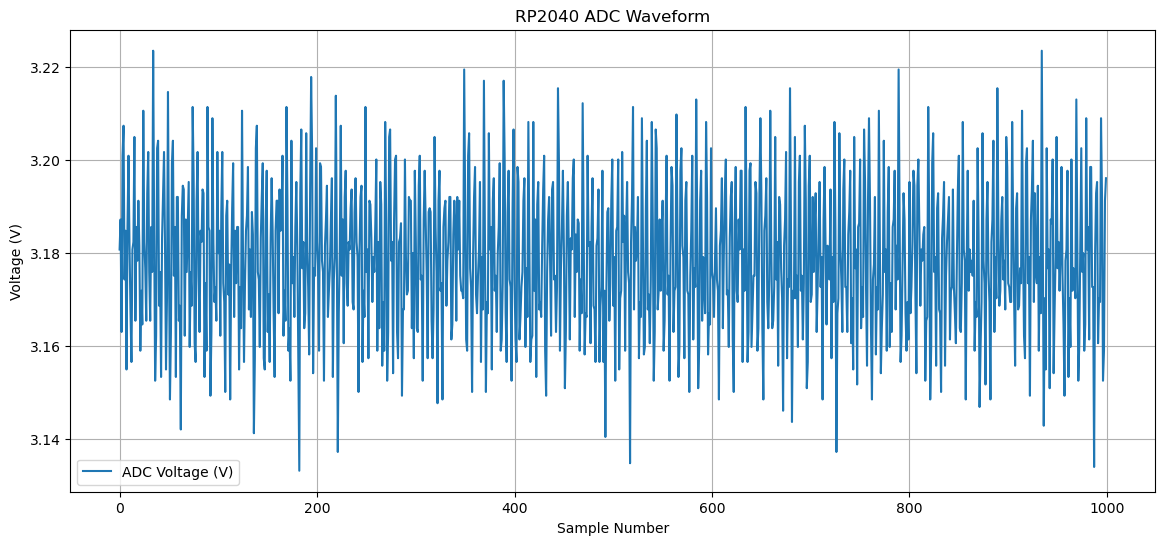

In [16]:
import serial
import matplotlib.pyplot as plt

# --- CONFIGURE HERE ---
COM_PORT = 'COM4'  # Replace with your RP2040 port
BAUD_RATE = 115200
BUFFER_SIZE = 1000  # Must match Arduino BUFFER_SIZE
# ----------------------

# Connect to RP2040
ser = serial.Serial(COM_PORT, BAUD_RATE, timeout=1)

raw_samples = []
avg_list = []
pp_list = []

while True:
    line = ser.readline().decode('utf-8').strip()
    if not line:
        continue
    if line.startswith("Average ADC:"):
        avg = float(line.split(":")[1].strip())
        avg_list.append(avg)
    elif line.startswith("Peak-to-Peak ADC:"):
        pp = float(line.split(":")[1].strip())
        pp_list.append(pp)
    elif line == "END":
        break
    else:
        try:
            raw_samples.append(int(line))
        except:
            pass

ser.close()

# Convert ADC to voltage
adc_to_voltage = [x * 3.3 / 4095 for x in raw_samples]

# --- PLOTTING ---
plt.figure(figsize=(14,6))

# Plot waveform
plt.plot(adc_to_voltage, label="ADC Voltage (V)")

# Draw horizontal line for average voltage
if avg_list:
    plt.axhline(y=avg_list[-1]*3.3/4095, color='r', linestyle='--', label=f"Average = {avg_list[-1]*3.3/4095:.2f} V")

# Peak-to-peak voltage line (approximate)
if pp_list:
    plt.axhline(y=(avg_list[-1] + pp_list[-1]/2)*3.3/4095, color='g', linestyle=':', label=f"Peak = {(avg_list[-1] + pp_list[-1]/2)*3.3/4095:.2f} V")
    plt.axhline(y=(avg_list[-1] - pp_list[-1]/2)*3.3/4095, color='g', linestyle=':', label=f"Min = {(avg_list[-1] - pp_list[-1]/2)*3.3/4095:.2f} V")

plt.title("RP2040 ADC Waveform")
plt.xlabel("Sample Number")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.show()